<a href="https://colab.research.google.com/github/JH-Y-324/first-repository/blob/master/Day10_Ch12(%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%26%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍷 와인 데이터 분석 프로젝트: 회귀와 분류

이번 통합 실습 프로젝트에서는 **와인(Wine) 데이터셋** 하나를 가지고 지도 학습의 두 가지 핵심 과제인 **회귀(Regression)**와 **분류(Classification)**를 모두 경험합니다. '와인의 화학 성분'이라는 동일한 특성(Feature) 데이터를 사용하여, 한 번은 '알코올 도수'를 예측하는 회귀 모델을, 다른 한 번은 '와인의 품종'을 맞추는 분류 모델을 만들어 봅니다.

특히, 이전 학습한 **기초 통계(상관분석, 회귀분석)** 지식이 머신러닝에서 어떻게 확장되고 적용되는지 연결해 봅니다.

**🎯 프로젝트 목표:**

1.  **데이터 탐색(EDA)**: 실제 데이터를 시각화하여 변수 간의 관계를 탐색하고, 분석 방향에 대한 인사이트를 얻습니다.
2.  **회귀 모델링**: 알코올 도수를 예측하는 모델을 만듭니다. 이때 **통계적 관점(statsmodels)**과 **머신러닝 관점(scikit-learn)**의 차이를 이해하고, **R2**, **MAE**, **RMSE**로 성능을 평가합니다.
3.  **분류 모델링**: 와인 품종을 예측하는 모델(로지스틱 회귀, 랜덤 포레스트)을 만들고, **정확도**와 **혼동 행렬**로 성능을 평가합니다.
4.  **결과 해석**: '특성 중요도'를 통해 두 문제에서 어떤 변수가 예측에 중요하게 사용되었는지 비교 분석하고, 최종 결론을 도출합니다.


## 사전 준비: 라이브러리 및 데이터 로드

scikit-learn에 내장된 와인(Wine) 데이터셋을 사용합니다. 이 데이터는 별도의 정제 과정 없이 바로 사용할 수 있을 정도로 깨끗합니다.


In [1]:
# 필요 라이브러리 설치
!pip install scikit-learn seaborn statsmodels

# 코랩에서 한글 폰트 사용을 위한 설정 (필요 시 주석 해제 후 실행)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,728 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and direc

In [1]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # 통계적 회귀 분석을 위한 라이브러리

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 한글 폰트 설정 (Mac 사용자는 'AppleGothic', Windows 사용자는 'Malgun Gothic' 등)
plt.rc('font', family='NanumGothic')
# plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. scikit-learn에서 와인 데이터셋 로드
wine = load_wine()

# 2. 데이터프레임으로 변환
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
data['target'] = wine.target

print("와인 데이터 준비 완료!")
print("데이터 크기:", data.shape)
data.head()

와인 데이터 준비 완료!
데이터 크기: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Part 1: 데이터 탐험 및 문제 정의

> **🎯 목표:** 데이터를 본격적으로 분석하기 전에, 데이터의 기본적인 구조와 변수 간의 관계를 시각적으로 탐색하고, 우리가 해결할 두 가지 문제를 명확히 정의합니다.


### 💡 핵심 개념:

**탐색적 데이터 분석(EDA, Exploratory Data Analysis)**은 데이터의 구조, 패턴, 이상치, 변수 간의 관계 등을 파악하기 위해 시각화와 기초 통계량을 활용하는 과정입니다. EDA를 통해 데이터에 대한 깊은 이해를 얻고, 이를 바탕으로 효과적인 분석 전략을 수립할 수 있습니다.


### 📌 수행 과제:

1.  `.info()`와 `.describe()`를 사용해 데이터의 기본 정보(데이터 타입, 결측치 유무)와 기술 통계량(평균, 표준편차 등)을 확인합니다.
2.  `seaborn`의 `pairplot`을 사용해 몇 가지 주요 변수들(`alcohol`, `flavanoids`, `proline`, `color_intensity`) 간의 관계를 시각적으로 탐색합니다.
3.  EDA 결과를 바탕으로, 우리가 이 데이터로 해결할 **회귀 문제**와 **분류 문제**를 각각 명확하게 정의합니다.


In [3]:
# TODO-1: 데이터프레임의 기본 정보(.info())와 기술 통계량(.describe())을 확인하세요.
print("===== 데이터 정보 =====")
data.info()
print("\n===== 기술 통계량 =====")
print(data.describe())

print(data['target'].value_counts())

===== 데이터 정보 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null   

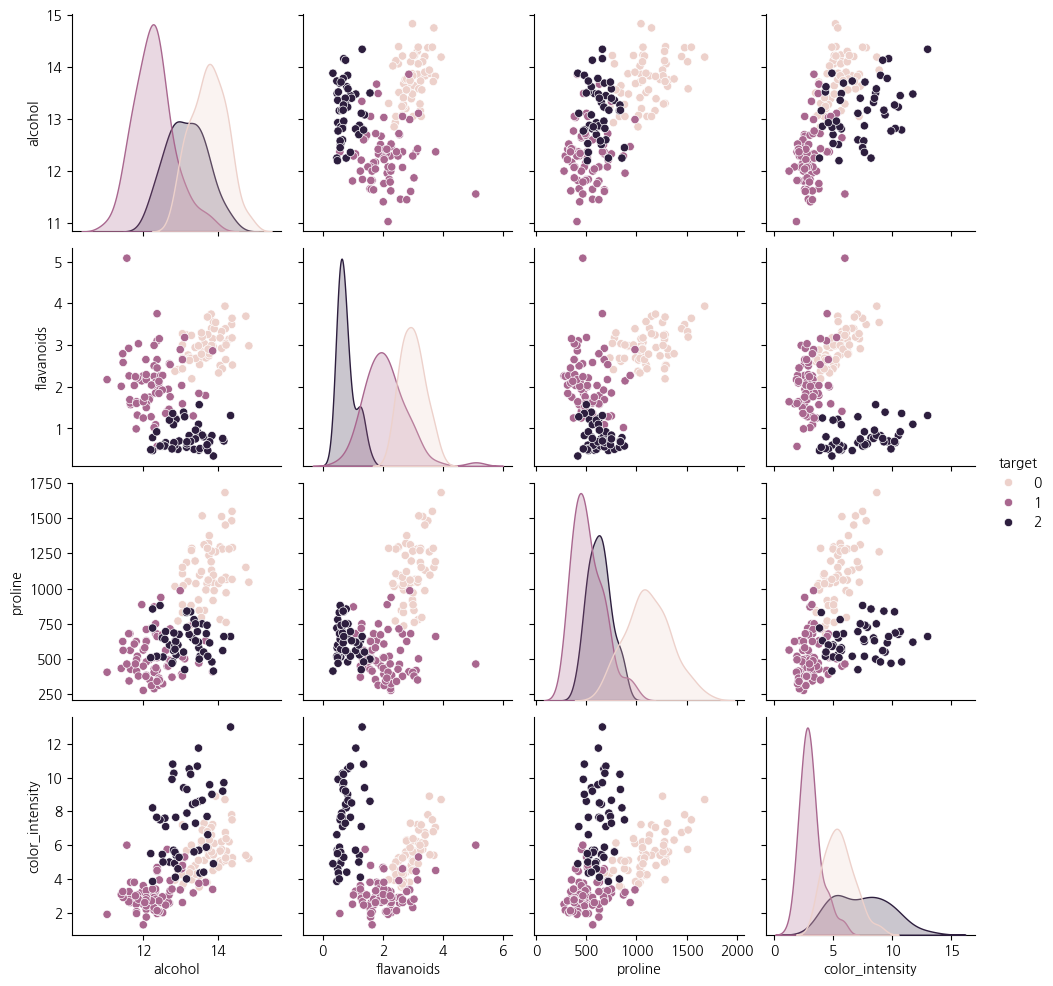

In [4]:
# TODO-2: pairplot을 사용해 ['alcohol', 'flavanoids', 'proline', 'color_intensity', 'target'] 컬럼 간의 관계를 시각화하세요.
# hue='target' 옵션을 추가하면 품종별로 색상을 다르게 표시해 줍니다.
sns.pairplot (data[['alcohol', 'flavanoids', 'proline', 'color_intensity', 'target']], hue='target')
plt.show()

# 문제 정의 (주석에 직접 작성)
# 회귀 문제 정의 (Part 2):
# 분류 문제 정의 (Part 3):

1. 그렇다. flavanoids와 proline은 target별로 분포가 확실히 갈린다
- flavanoids (가장 강력함).
- proline은 target 0이 특히 높은 구간(오른쪽)에 많이 있다. target 1, 2는 더 낮은 구간에 분포한다.
2. proline이 가장 직관적으로 양의 관계(+)가 보인다
- 회귀 문제에서 proline이 알코올 도수 예측에 중요한 설명 변수일 것이라는 가설을 세울 수 있다
3. 이 eda 결과만 보면 분류(품종 맞추기)가 훨씬 더 직관적이고 쉬워 보인다.
- flavanoids, color_intensity, proline같은 변수에서 색깔이 서로 다른 영역에 뚜렷하게 모여 있다
- 반면 회귀는 alcohol과의 관계가 완전 직선이라기보단 클래스(품종)별로 군집이 나뉜 구조

### 🤔 생각해 볼 문제:

1.  `pairplot`의 대각선에 위치한 히스토그램을 보면, `flavanoids`나 `proline` 같은 변수들이 품종(target)별로 뚜렷하게 구분되는 경향을 보이나요?
2.  `alcohol`과 다른 변수들 간의 산점도를 보면, 어떤 변수와 가장 뚜렷한 선형 관계를 보이는 것 같나요? (예: `color_intensity` 등)
3.  이 EDA 결과를 바탕으로, '연속된 숫자(알코올 도수)'를 맞추는 문제와 '정해진 종류(품종)'를 맞추는 문제 중 어떤 것이 더 직관적으로 다가오나요?

---

### 📢 발표 시 담으면 좋을 것들

Part 1을 맡은 팀은 **데이터 탐험가**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** EDA가 왜 중요한지, '데이터를 보기 전에 모델부터 만드는 것은 지도 없이 여행을 떠나는 것과 같다'는 비유를 들어 설명합니다.
2.  **분석 결과 공유:** `describe()` 결과를 통해 각 변수의 스케일이 제각각임을 보여주고, 이것이 왜 스케일링이 필요한지에 대한 단서가 되는지 설명합니다. `pairplot` 결과를 보여주며, 변수 간의 상관관계(회귀의 힌트)와 품종별 구분(분류의 힌트)을 발견한 내용을 공유합니다.


1.
- eda의 역할: 어떤 모델을 쓰고 어떤 변수를 중요하게 볼지에 대한 가설을 세우는 단계
  - 어떤 변수들이 타겟과 관계가 있어 보이는지 (회귀에 대한 힌트)
  - 어떤 변수들이 클래스를 잘 구분하는지 (분류에 대한 힌트)
  - 데이터에 스케일 문제, 이상치, 분포 왜곡이 있는지
  - 어떤 모델이 맞을지 감을 잡게 해줌
2.
- describe()의 결과로
  - proline은 278에서 1680 (수백에서 천 단위), nonflavanoid_phenols는 0.13에서 0.66 (소수 단위), color_intensity는 1.28에서 13 (한 자리~두 자리)로 스케일이 제각각이라는 것을 알 수 있다
  - 스케일링이 필요한 이유는, 스케일링 없이 바로 모델을 학습하면 값의 크기가 큰 변수가 모델에 더 큰 영향력을 갖게 되어 학습이 편향될 수 있기 때문이다
- pairplot의 결과
  - 회귀의 힌트 (alcohol과 관계 있어 보이는 변수들)
    - proline - 양의 경향(대체로 올라가는 느낌)
    - flavanoids - 어느 정도 양의 관계
    - 이 둘은 값이 함께 증가하는 경향이 관찰되며, 이는 회귀 모델에서 중요한 설명 변수가 될 수 있다는 가설을 세울 수 있게 해준다
  - 분류 힌트 (품종별로 확실히 갈라지는 변수들)

## Part 2: 알코올 도수 예측 모델링 (회귀)

> **🎯 목표:** 통계 부분에서 배운 회귀분석을 머신러닝으로 확장합니다. 선형 회귀와 랜덤 포레스트 모델을 만들고, 다양한 지표(R2, MAE, RMSE)로 성능을 평가합니다.


### 💡 핵심 개념: 통계적 회귀 vs 머신러닝 회귀

우리는 기초 통계 시간에 `p-value`를 통해 "이 변수가 결과에 유의미한 영향을 미치는가?"를 검정하는 데 집중했습니다. 이를 **설명(Explanation)**을 위한 모델링이라고 합니다.

반면, 머신러닝에서는 "새로운 데이터가 들어왔을 때 결과를 얼마나 잘 맞추는가?"에 집중합니다. 이를 **예측(Prediction)**을 위한 모델링이라고 합니다. 따라서 머신러닝에서는 `p-value`보다 실제값과 예측값의 차이인 **오차(Error)**를 줄이는 것이 가장 중요합니다.


### 📌 수행 과제:

1.  **데이터 준비**: 'alcohol'을 타겟(y)으로, 나머지를 특성(X)으로 정의하고 학습/테스트 데이터로 분리합니다.
2.  **통계적 분석**: `statsmodels`를 사용하여 통계적 관점에서 회귀 모델을 만들고, `summary()`를 통해 p-value를 확인해 봅니다.
3.  **머신러닝 모델링**:
    - **모델 A (선형 회귀)**: 데이터를 스케일링한 후 학습하고 성능을 평가합니다.
    - **모델 B-1 (의사 결정나무)**: 스케일링 없이 학습하고 성능을 평가합니다.
    - **모델 B-2 (랜덤 포레스트)**: 스케일링 없이 학습하고 성능을 평가합니다.
4.  **성능 평가 및 비교**: MSE, RMSE 뿐만 아니라 **MAE(평균 절대 오차)**, **R2 Score(결정 계수)**를 사용하여 모델을 다각도로 평가합니다.


                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     13.91
Date:                Mon, 05 Jan 2026   Prob (F-statistic):           3.94e-18
Time:                        13:17:32   Log-Likelihood:                -113.89
No. Observations:                 142   AIC:                             253.8
Df Residuals:                     129   BIC:                             292.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

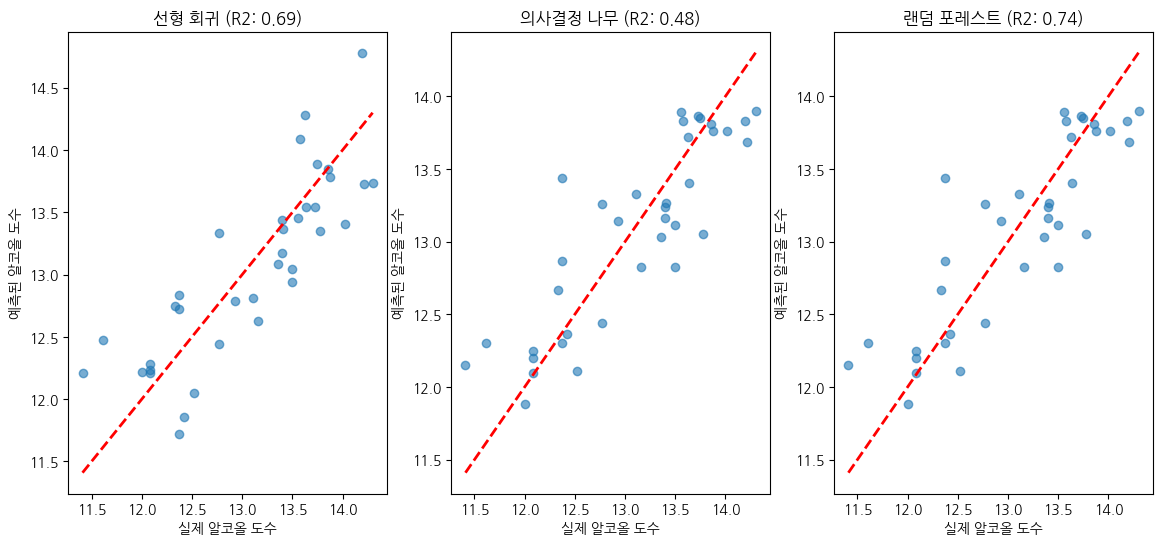

In [5]:
# 1. 회귀 문제용 데이터 준비
# TODO-1: 'alcohol'를 y로, 'alcohol'와 'target'을 제외한 나머지를 X로 정의하고 데이터를 분리하세요.
X_reg = data.drop(columns=['alcohol', 'target'])
y_reg = data['alcohol']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# 2. 통계적 관점: statsmodels 사용 (변수 설명력 확인)
# 상수항(절편) 추가 필요
X_train_stat = sm.add_constant(X_train_reg)
model_stat = sm.OLS(y_train_reg, X_train_stat).fit()
# 결과 요약 출력 (P>|t| 값이 0.05보다 작은 변수가 통계적으로 유의미함)
print(model_stat.summary())


# 3. 머신러닝 관점: scikit-learn 사용 (예측 성능 극대화)

# 모델 A: 선형 회귀
# TODO-2: StandardScaler를 이용해 데이터를 표준화하세요. (주의: fit은 train 데이터에만!)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# TODO-3: 선형 회귀 모델을 학습(fit)시키고 예측(predict)하세요.
model_lin = LinearRegression()
model_lin.fit(X_train_reg_scaled, y_train_reg)
pred_lin = model_lin.predict(X_test_reg_scaled)

# 모델 B-1: 의사결정 나무 회귀
# TODO-4: 의사결정 나무 회귀 모델을 학습시키고 예측하세요.
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train_reg, y_train_reg)
pred_dtr = model_dtr.predict(X_test_reg)

# 모델 B-2: 랜덤 포레스트 회귀
# TODO-5: 랜덤 포레스트 회귀 모델을 학습시키고 예측하세요.
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train_reg, y_train_reg)
pred_rfr = model_rfr.predict(X_test_reg)

# 4. 결과 비교 및 평가 (RMSE, MAE, R2)
# TODO-6: 선형 회귀와 의사결정나무, 랜덤 포레스트의 RMSE, MAE, R2 Score를 계산하세요.
rmse_lin = np.sqrt(mean_squared_error(y_test_reg, pred_lin))
mae_lin = mean_absolute_error(y_test_reg, pred_lin)
r2_lin = r2_score(y_test_reg, pred_lin)

rmse_dtr = np.sqrt(mean_squared_error(y_test_reg, pred_dtr))
mae_dtr = mean_absolute_error(y_test_reg, pred_dtr)
r2_dtr = r2_score(y_test_reg, pred_dtr)

rmse_rfr = np.sqrt(mean_squared_error(y_test_reg, pred_rfr))
mae_rfr = mean_absolute_error(y_test_reg, pred_rfr)
r2_rfr = r2_score(y_test_reg, pred_rfr)


print("\n===== 머신러닝 회귀 모델 성능 비교 =====")
print(f"[선형 회귀] RMSE: {rmse_lin:.4f} | MAE: {mae_lin:.4f} | R2: {r2_lin:.4f}")
print(f"[의사결정 나무] RMSE: {rmse_dtr:.4f} | MAE: {mae_dtr:.4f} | R2: {r2_dtr:.4f}")
print(f"[랜덤 포레스트] RMSE: {rmse_rfr:.4f} | MAE: {mae_rfr:.4f} | R2: {r2_rfr:.4f}\n")

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
axes[0].scatter(y_test_reg, pred_lin, alpha=0.6)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_title(f'선형 회귀 (R2: {r2_lin:.2f})')
axes[0].set_xlabel('실제 알코올 도수')
axes[0].set_ylabel('예측된 알코올 도수')
axes[1].scatter(y_test_reg, pred_rfr, alpha=0.6)
axes[1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[1].set_title(f'의사결정 나무 (R2: {r2_dtr:.2f})')
axes[1].set_xlabel('실제 알코올 도수')
axes[1].set_ylabel('예측된 알코올 도수')
axes[2].scatter(y_test_reg, pred_rfr, alpha=0.6)
axes[2].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[2].set_title(f'랜덤 포레스트 (R2: {r2_rfr:.2f})')
axes[2].set_xlabel('실제 알코올 도수')
axes[2].set_ylabel('예측된 알코올 도수')
plt.show()

1.
- 유의미한 변수는 p가 0.05보다 작은 변수들이다
  - malic_acid, alcalinity_of_ash, color_intensity, proline이 있다
- 유의미하지 않은 변수들은 나머지 8개이다
- 랜덤포레스트에서는 성능이 오를 수도, 거의 안 바뀔 수도 있다. ols의 p-value는 '다른 변수들이 고정되어 있을 때의 선형적 영향'만 보는 지표이다. 그런데 랜덤포레스트는 변수 간 상호작용을 활용할 수 있기 때문에 제거한다고해서 반드시 성능이 좋아진다고 단정할 수는 없다.
2.
- 선형회귀 R제곱은 0.6889, 랜덤포레스트 R²은 0.7416이다.
- 따라서 설명력이 더 높은 건 랜덤포레스트이다.
3.
- 선형회귀 MAE는 0.3675, 랜덤포레스트 MAE는 0.3159이다.
- 알코올 도수를 평균적으로 0.3~0.4도 정도 틀린다고 말할 수 있다

### 🤔 생각해 볼 문제:

1.  `statsmodels`의 결과(`P>|t|`)에서 통계적으로 유의미하지 않다고 나온 변수들은 무엇인가요? 이 변수들을 제거하면 머신러닝 모델의 성능이 오를까요, 내릴까요?
2.  **R2 Score(결정 계수)**는 1에 가까울수록 모델이 데이터를 잘 설명한다는 뜻입니다. 두 모델 중 어떤 모델의 설명력이 더 높은가요?
3.  **MAE(평균 절대 오차)**를 보면, 우리 모델은 알코올 도수를 평균적으로 몇 도 정도 틀리고 있나요? (예: 0.5도 차이)

---

### 📢 발표 시 담으면 좋을 것들

Part 2를 맡은 팀은 **회귀 모델러**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 통계적 회귀(설명 중심)와 머신러닝 회귀(예측 중심)의 차이를 설명합니다.
2.  **평가지표 해석:** RMSE와 MAE, R$^2$의 차이를 설명합니다.
3.  **결과 해석:** 선형 회귀와 랜덤 포레스트의 성능 차이를 비교하고, 알코올 도수 예측에는 어떤 모델이 더 적합한지 결론을 내립니다.


1.
- 통계적 회귀의 목적은 어떤 변수가 결과에 유의미한가 설명하는 것이다. p-value와 계수를 해석하는 것에 핵심이 있다. 앞에서는 유의미한 변수 네 개를 확인했다.
- 머신러닝 회귀의 목적은 새 데이터에서 얼마나 잘 맞추는가를 예측하는 것이다. 오차(rmse, mae)를 최소화하고 R 제곱을 최대화하는 것이 핵심이다. 앞에서 봤을 때 랜덤포레스트가 성능이 제일 좋은 것을 확인했다.
2.
- R 제곱은 설명력을 뜻하고 높을수록 좋다
- MAE는 평균적으로 얼마나 틀렸는지를 파악할 수 있고 직관적이다
- RMSE는 큰 오차에 대해 더 크게 벌점을 준다 (큰 실수를 싫어함)
3.
- 랜덤포레스트가 전 지표에서 우수하다
- 알코올 도수 예측에는 랜덤포레스트가 더 적합하다

## Part 3: 와인 품종 분류 모델링 (분류)

> **🎯 목표:** 이제 연속된 숫자가 아닌, '품종(Class)'을 예측해 봅니다. 로지스틱 회귀와 랜덤 포레스트를 사용하며, 분류 문제만의 독특한 평가지표들을 익힙니다.


### 💡 핵심 개념 (보충): 랜덤 포레스트란? 🌳🌲🌳

앞서 회귀 문제에서도 사용했던 **랜덤 포레스트(Random Forest)**는 분류 문제에서도 매우 강력합니다. 여러 개의 **의사결정 나무(Decision Tree)**들이 모여 투표를 통해 결과를 결정하는 원리입니다.

1.  **회귀일 때:** 여러 나무들의 예측값의 **평균**을 사용.
2.  **분류일 때:** 여러 나무들의 예측 결과 중 **다수결**로 결정.

이처럼 앙상블(Ensemble) 모델은 다양한 문제에 유연하게 적용될 수 있습니다.


### 📌 수행 과제:

1.  분류 문제에 맞게 특성(X)과 타겟(y)을 정의하고, 학습/테스트 데이터로 분리합니다.
2.  **모델 C (로지스틱 회귀)**, **모델 D-1 (단일 의사결정 나무)**, **모델 D-2 (랜덤 포레스트)** 세 가지 모델을 모두 학습시키고 예측을 수행합니다.
3.  **종합 성능 평가**
    - 세 모델의 **정확도**를 비교합니다.
    - 세 모델의 **혼동 행렬**을 시각화하여 비교합니다.
    - 세 모델의 **분류 리포트(정밀도, 재현율, F1-점수)**를 비교하여, 어떤 모델이 각 품종을 얼마나 잘 예측하는지 심층 분석합니다.


===== [1] 모델별 정확도 비교 =====
- 로지스틱 회귀: 0.9722
- 의사결정 나무: 0.9444
- 랜덤 포레스트: 1.0000


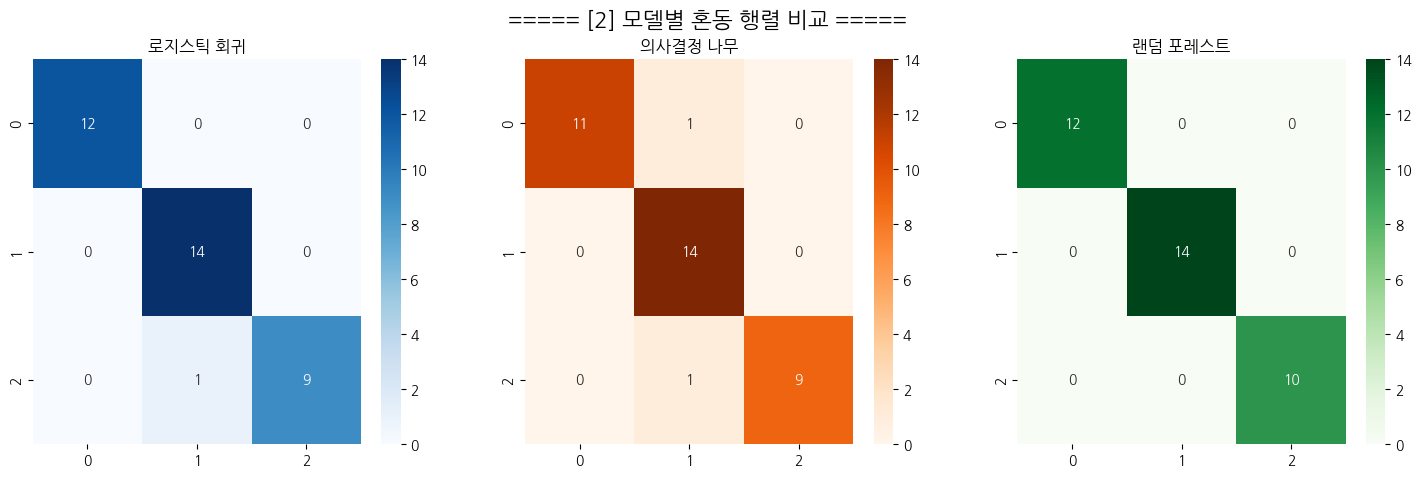


===== [3] 모델별 분류 리포트 비교 =====
--- 로지스틱 회귀 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

--- 의사결정 나무 ---
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

--- 랜덤 포레스트 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00       

In [11]:
# 1. 분류 문제용 데이터 준비
# TODO-1: 'target' 컬럼을 제외하여 특성(X)을, 'target' 컬럼을 타겟(y)으로 지정하세요.
X_cls = data.drop(columns=['target'])
y_cls = data['target']

# TODO-2: train_test_split을 이용해 데이터를 8:2 비율, 동일한 클래스 비율로 분리하세요.
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# --- 모델 학습 및 예측 ---

# 모델 C: 로지스틱 회귀 (이름은 회귀지만 분류 모델입니다!)
# TODO-3: 데이터를 표준화(StandardScaler)하세요. (주의: fit은 train 데이터에만!)
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

# TODO-4: 로지스틱 회귀 모델을 학습(fit)시키고 예측(predict)하세요.
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_cls_scaled, y_train_cls)
pred_lr = model_lr.predict(X_test_cls_scaled)

# 모델 D-1: 단일 의사결정 나무
# TODO-5: 의사결정 나무 모델을 학습시키고 예측하세요.
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_cls, y_train_cls)
pred_dt = model_dt.predict(X_test_cls)

# 모델 D-2: 랜덤 포레스트
# TODO-6: 랜덤 포레스트 모델을 학습시키고 예측하세요.
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(X_train_cls, y_train_cls)
pred_rfc = model_rfc.predict(X_test_cls)


# --- 모델 성능 종합 평가 ---

# 1. 정확도(Accuracy) 비교
# TODO-7: 각 모델의 예측 결과를 바탕으로 정확도(accuracy_score)를 계산하세요.
accuracy_lr = accuracy_score(y_test_cls, pred_lr)
accuracy_dt = accuracy_score(y_test_cls, pred_dt)
accuracy_rfc = accuracy_score(y_test_cls, pred_rfc)
print("===== [1] 모델별 정확도 비교 =====")
print(f"- 로지스틱 회귀: {accuracy_lr:.4f}")
print(f"- 의사결정 나무: {accuracy_dt:.4f}")
print(f"- 랜덤 포레스트: {accuracy_rfc:.4f}")

# 2. 혼동 행렬(Confusion Matrix) 시각화
# TODO-8: 각 모델의 예측 결과를 바탕으로 혼동 행렬(confusion_matrix)을 계산하세요.
cm_lr = confusion_matrix(y_test_cls, pred_lr)
cm_dt = confusion_matrix(y_test_cls, pred_dt)
cm_rfc = confusion_matrix(y_test_cls, pred_rfc)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('===== [2] 모델별 혼동 행렬 비교 =====', fontsize=16)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('로지스틱 회귀')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('의사결정 나무')
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('랜덤 포레스트')
plt.show()

# 3. 분류 리포트(Classification Report) 비교
# TODO-9: 각 모델의 예측 결과를 바탕으로 분류 리포트(classification_report)를 출력하세요.
print("\n===== [3] 모델별 분류 리포트 비교 =====")
print("--- 로지스틱 회귀 ---")
print(classification_report(y_test_cls, pred_lr))
print("--- 의사결정 나무 ---")
print(classification_report(y_test_cls, pred_dt))
print("--- 랜덤 포레스트 ---")
print(classification_report(y_test_cls, pred_rfc))

1.
- 회귀 지표는 숫자를 얼마나 가깝게 맞췄는가를 본다
  - RMSE: 예측값과 실제값의 차이를 숫자로 계산하고 큰 오차에 더 민감
  - R제곱: 모델이 실제 값의 변동을 얼마나 설명하는지의 설명력
- 분류 지표는 맞혔는지 틀렸는지의 여부와 무엇을 무엇으로 헷갈렸는지를 본다
  - accuracy(정확도): 전체 중 맞춘 비율
  - precision(정밀도): A라고 예측한 것 중 진짜 A 비율
  - recall(재현율): 진짜 A 중에서 맞춘 비율
2.
- 랜덤포레스트가 더 좋고 안정적이었다
- 단일 의사결정나무는 과적합 가능성이 높다
- 랜덤포레스트는 여러 나무가 각각 다르게 학습하고 분류는 다수결 투표로 최종 결정되는 방식이기 때문에 몇 개가 틀려도 전체적으로 안정적이다
3.
- 데이터가 복잡하게 얽혀 있다면 직선 하나로는 잘 못 나눈다. 그래서 오분류가 늘고 성능이 떨어질 가능성이 크다.

### 🤔 생각해 볼 문제:

1.  회귀 모델의 평가지표(RMSE, R2)와 달리, 분류 모델의 평가지표(정확도, 정밀도, 재현율)는 어떤 점이 다른가요?
2.  단일 의사결정 나무와 랜덤 포레스트의 성능 차이는 어떠한가요? 왜 랜덤 포레스트가 더 안정적인 성능을 보일까요?
3.  로지스틱 회귀는 '선형' 경계면을 가집니다. 만약 데이터가 복잡하게 얽혀 있다면 로지스틱 회귀의 성능은 어떻게 될까요?

---

### 📢 발표 시 담으면 좋을 것들

Part 3을 맡은 팀은 **분류 모델러**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** '분류'가 무엇인지 정의하고, '정확도'만으로는 부족할 수 있는 상황(불균형 데이터 등)을 언급하며 혼동 행렬의 필요성을 설명합니다.
2.  **분석 과정 리뷰:** 로지스틱 회귀(선형), 의사결정 나무(비선형 단일), 랜덤 포레스트(비선형 앙상블) 세 모델을 비교합니다.
3.  **결과 해석:** 혼동 행렬을 통해 우리 모델이 어떤 품종을 헷갈려하는지 구체적으로 짚어줍니다. 최종적으로 가장 성능이 좋은 모델을 선정하고 그 이유를 설명합니다.


1.
- 분류는 입력 데이터로부터 클래스를 예측하는 문제이다
- 정확도 accuracy는 전체 중 맞춘 비율인데 정확도만 보면 위험할 때가 있다. 예를 들어 한 클래스가 압도적으로 많은 데이터 불균형 상황일 때 말이다. 이 때 혼동행렬 confusion matrix로 어떤 품종을 어떤 품종으로 헷갈렸는지 확인해야 한다.
2.
- 로지스틱 회귀는 스케일링이 필요하다
- 랜덤 포레스트는 다수결 투표 방식으로 의사결정나무에 비해 안정적이고 성능이 좋다
3.
- 로지스틱은 2번 품종 1개를 1번으로 잘못 분류했고, 결정나무는 0번 1개를 1번으로 2번 1개를 1번으로 잘못 분류했다. 랜덤포레스트는 완벽하게 분류했다.
- 랜덤 포레스트의 정확도는 1.00이고 최종적으로 가장 성능이 좋은 모델은 랜덤 포레스트이다.

## Part 4: 핵심 변수 발견 및 결론

> **🎯 목표:** 성능이 뛰어난 랜덤 포레스트 모델의 '특성 중요도'를 분석하여, 회귀와 분류 문제에서 각각 어떤 변수가 예측에 중요하게 사용되었는지 비교하고 종합적인 결론을 도출합니다.


### 💡 핵심 개념:

**특성 중요도(Feature Importance)**는 모델이 예측을 할 때 어떤 특성(변수)을 더 중요하게 고려했는지를 나타내는 점수입니다. 이를 통해 모델의 내부 동작을 이해하고, 비즈니스적으로 어떤 변수가 핵심적인지 파악하는 데 매우 유용한 정보를 제공합니다.


### 📌 수행 과제:

1.  회귀 문제에서 학습한 `RandomForestRegressor`의 특성 중요도를 계산하고 시각화합니다.
2.  분류 문제에서 학습한 `RandomForestClassifier`의 특성 중요도를 계산하고 시각화합니다.
3.  두 결과를 비교하며, 예측 목표에 따라 어떤 변수들의 중요도가 달라지는지 분석하고 결론을 도출합니다.


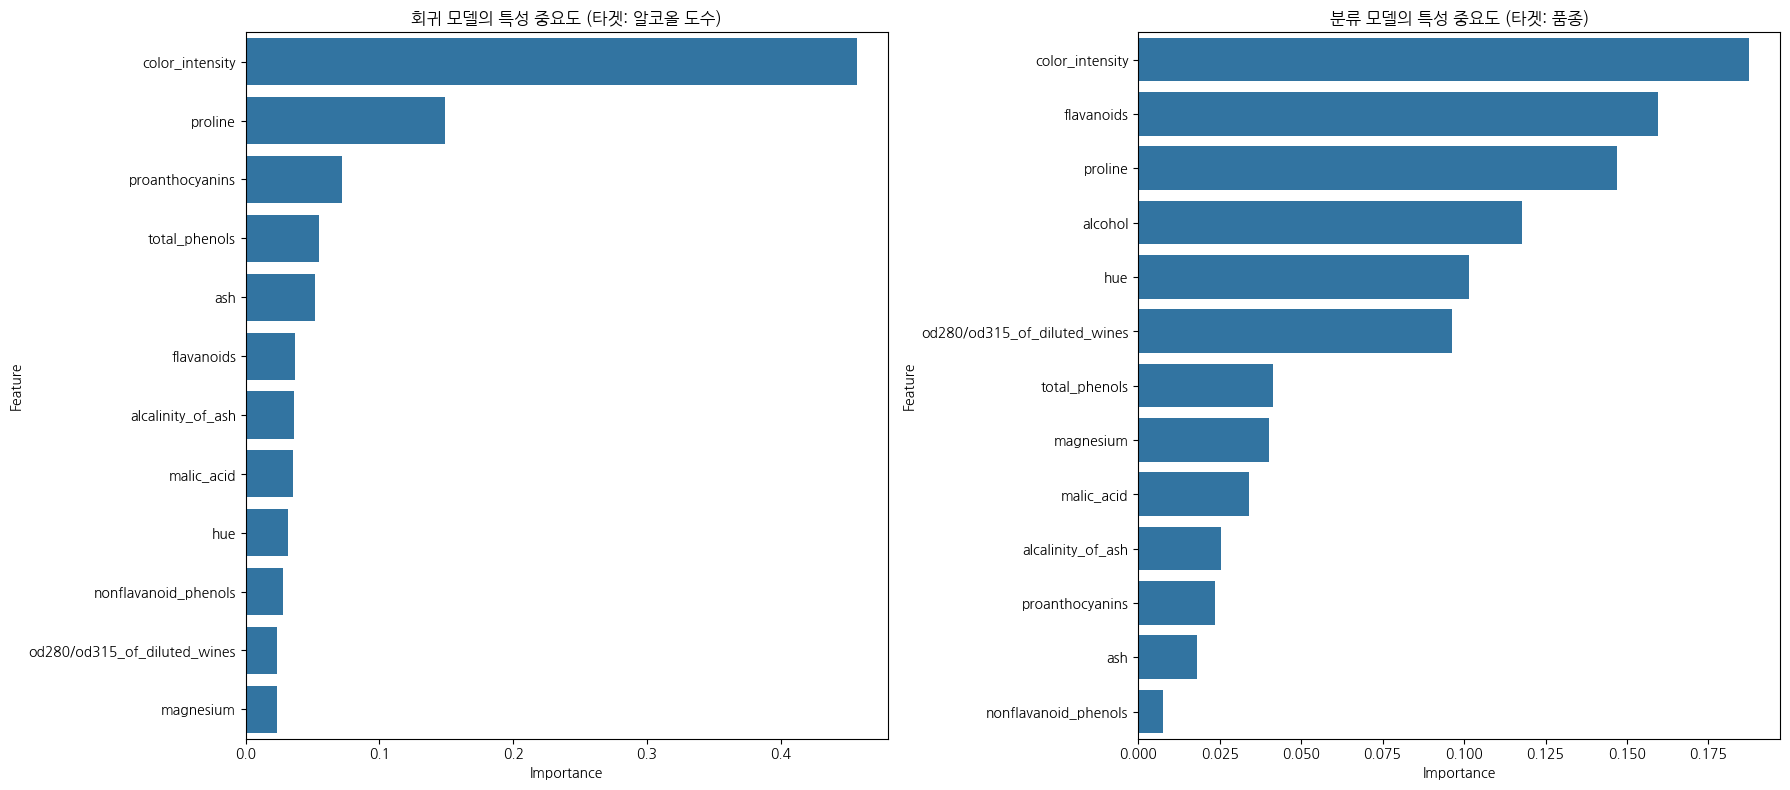

In [12]:
# 1. 회귀 모델의 특성 중요도 분석
# TODO-1: 회귀 모델(model_rfr)의 특성 중요도를 확인하고(feature_importances_ 속성 이용), 중요도 순으로 정렬하여 시각화하세요.
importances_reg = model_rfr.feature_importances_
features_reg = X_train_reg.columns
imp_reg_df = pd.DataFrame({'Feature': features_reg, 'Importance': importances_reg}).sort_values(by='Importance', ascending=False)

# 2. 분류 모델의 특성 중요도 분석
# TODO-2: 분류 모델(model_rfc)의 특성 중요도를 확인하고(feature_importances_ 속성 이용), 중요도 순으로 정렬하여 시각화하세요.
importances_cls = model_rfc.feature_importances_
features_cls = X_train_cls.columns
imp_cls_df = pd.DataFrame({'Feature': features_cls, 'Importance': importances_cls}).sort_values(by='Importance', ascending=False)

# 3. 결과 시각화 비교
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='Importance', y='Feature', data=imp_reg_df, ax=axes[0])
axes[0].set_title('회귀 모델의 특성 중요도 (타겟: 알코올 도수)')

sns.barplot(x='Importance', y='Feature', data=imp_cls_df, ax=axes[1])
axes[1].set_title('분류 모델의 특성 중요도 (타겟: 품종)')

plt.tight_layout()
plt.show()

1. color_intensity, proline, proanthocyanins
2. color_intensity, flavanoids, proline
3. 목표가 달랐기 때문이다. 회귀는 알코올 도수를 예측하는 게 목표였기 때문에 도수와 직접적인 연관성이 큰 변수가 상위에 위치하게 됐고 분류는 품종을 예측하는 데(클래스를 잘 구분하는 데) 도움이 되는 변수가 중요해서 품종별 분포가 확실히 갈리는 변수가 상위로 올라왔다. 이를 통해 우리는 '문제 정의'가 중요하다는 점(비즈니스 목표에 따라 필요한 데이터, 변수가 바뀌므로)을 알 수 있다.

### 🤔 생각해 볼 문제:

1.  '알코올 도수'를 예측하는 데 가장 중요했던 상위 3개 변수는 무엇인가요?
2.  와인 '품종'을 예측하는 데 가장 중요했던 상위 3개 변수는 무엇인가요?
3.  두 문제의 특성 중요도가 다르게 나온 이유는 무엇일까요? 이 결과를 통해 우리는 무엇을 배울 수 있나요?

---

### 📢 발표 시 담으면 좋을 것들

Part 4를 맡은 팀은 **데이터 분석가**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** '특성 중요도'가 어떻게 복잡한 모델의 예측 근거를 이해하게 해주는 '블랙박스를 여는 열쇠' 역할을 하는지 강조합니다.
2.  **분석 결과 종합:** Part 2의 회귀 문제와 Part 3의 분류 문제의 최종 결과를 간략히 요약합니다. 이어서 두 문제에 대한 특성 중요도 그래프를 나란히 보여주며, 예측 목표에 따라 핵심 변수가 어떻게 달라지는지 시각적으로 설명합니다.
3.  **최종 결론 및 제언:** '우리가 무엇을 예측하고 싶은가에 따라 데이터의 같은 변수라도 그 중요성이 달라진다'는 점을 최종 결론으로 제시합니다. 이로부터 '비즈니스 문제 정의가 왜 데이터 분석의 가장 중요한 첫 단계인지'에 대해 토의를 이끌며 전체 프로젝트를 마무리합니다.


1.
- 랜덤 포레스트같은 모델은 성능은 좋지만 내부 판단 기준이 잘 보이지 않는 블랙박스와 같다
- 특성 중요도는 모델이 예측에 사용한 변수의 기여도를 점수로 보여준다
- 즉, 모델이 무엇을 보고 판단했는지를 알려주는 도구이므로 블랙박스를 여는 열쇠라고 볼 수 있다
2.
- 회귀와 분류 모두에서 랜덤 포레스트가 가장 우수했다
- 회귀와 분류에서 공통으로 핵심적인 변수는 color_intensity와 proline이다
- 회귀에서는 color_intensity가 압도적으로 1등이었다. (알코올 도수 예측에 가장 결정적인 단서로 볼 수 있음)
- 분류에서는 flavanoids가 2등으로 특히 중요한 변수로 나타났다. (품종별로 구분되는 특징이 강함)
3.
목표가 알코올 도수 예측이면 도수와 직접 관련된 변수에 집중해야하고 목표가 품종 분류면 품종 간 차이를 잘 드러내는 변수에 집중해야한다. 따라서 분석, 모델링 전에 예측 목표가 무엇인지, 그 목표가 비즈니스에서 어떤 의미인지를 먼저 결정해야한다.